In [1]:
# !pip install fastai

In [2]:
# !python -m pip install --upgrade pip

In [3]:

# import keras as tf
# print(tf.__version__)

In [1]:
import audioread
import librosa
import sounddevice as sd
import struct
import wave
import contextlib
from scipy.signal import spectrogram
import sys
import glob
from scipy.io import wavfile as wav
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit
import keras
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.models import Model, Sequential
from keras.layers import Dense, Conv1D, GlobalAveragePooling1D
from keras.layers import Input
from keras import backend as K

Using TensorFlow backend.


In [2]:
filename = "D:/mainproject/Data/donateacry-corpus-master/donateacry-corpus-master/donateacry-ios-upload-bucket/090C15A8-5406-4EA5-97A3-81F6527227C0-1431333076-1.0-m-72-hu.caf"
file_ios = "D:/mainproject/Data/donateacry-corpus-master/donateacry-corpus-master/donateacry-ios-upload-bucket/"  # .caf
file_android = "D:/mainproject/Data/donateacry-corpus-master/donateacry-corpus-master/donateacry-android-upload-bucket/"  # .3gp
out_path = "D:/mainproject/Data/wav/BabySounds/"

ios = glob.glob(file_ios + '/*.caf')
android = glob.glob(file_android + '/*.3gp')

filename.split('/')[-1]
print(out_path)

D:/mainproject/Data/wav/BabySounds/


In [3]:
def wav_plotter(full_path, class_label):   
    rate, wav_sample = wav.read(full_path)
    wave_file = open(full_path,"rb")
    riff_fmt = wave_file.read(36)
    bit_depth_string = riff_fmt[-2:]
    bit_depth = struct.unpack("H",bit_depth_string)[0]
    print('sampling rate: ',rate,'Hz')
    print('bit depth: ',bit_depth)
    print('number of channels: ',wav_sample.shape)
    print('duration: ',wav_sample.shape[0]/rate,' second')
    print('number of samples: ',len(wav_sample))
    print('class: ',class_label)
    plt.figure(figsize=(12, 4))
    plt.plot(wav_sample) 
    return ipd.Audio(full_path)

sampling rate:  8000 Hz
bit depth:  16
number of channels:  (55680,)
duration:  6.96  second
number of samples:  55680
class:  hei


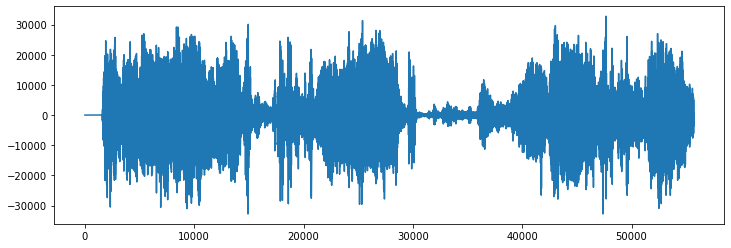

In [4]:
fn1 = out_path + '0f257dac-7d6f-4575-9192-e3b4dcd3d4ef-1430185476161-1.7-f-26-lo.3gp.wav'
wav_plotter(fn1,'hei')
# print(fn)

sampling rate:  16000 Hz
bit depth:  16
number of channels:  (112000,)
duration:  7.0  second
number of samples:  112000
class:  hei


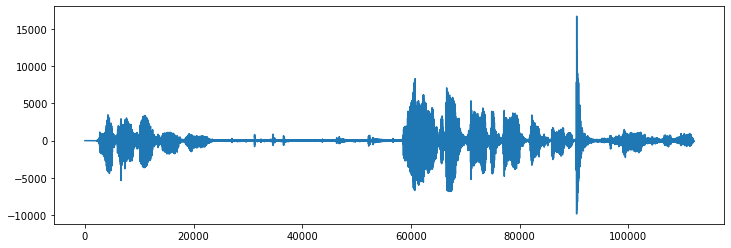

In [5]:
fn = out_path + '0FDFDED3-9171-4F10-92A5-3187AE205BFB-1436219426-1.1-m-04-hu.caf.wav'
wav_plotter(fn,'hei')

In [6]:
fs, wav_sample = wav.read(fn1)
f, t, Sxx = spectrogram(wav_sample, fs=fs)

C:\Users\91902\anaconda3\envs\env\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


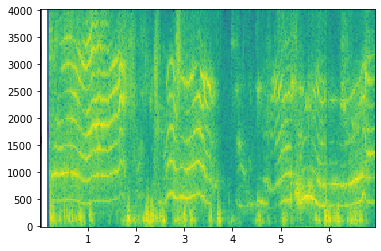

In [7]:
plt.pcolormesh(t, f, 10 * np.log10(Sxx),shading='auto')


In [8]:
fs, wav_sample = wav.read(fn)
f1, t1, Sxx = spectrogram(wav_sample, fs=fs)

C:\Users\91902\anaconda3\envs\env\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


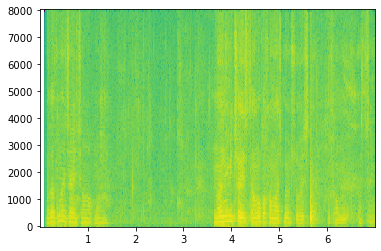

In [9]:
plt.pcolormesh(t1, f1, 10 * np.log10(Sxx),shading='auto')

In [10]:
sum(sum(abs(Sxx)))

6753618.422147492

In [11]:
import glob 
files = glob.glob(out_path + '*.wav')
files
file = files[1]
filetype = file[-7:-4]
file
reason = file[-10:-8]
age = file[-13:-11]
gender = file[-15:-14]
file

'D:/mainproject/Data/wav/BabySounds\\01a592eb-513d-4431-b7ba-b0fba5a00908-1430339263195-1.7-m-04-hu.3gp.wav'

In [12]:
rate, wav_sample = wav.read(file)

In [13]:
wav_sample
wav_sample
rate

8000

In [14]:
sd.play(wav_sample[::2], 8000)

In [15]:
sd.play(wav_sample[1::2], 8000)
l = np.array([1,2,3,4,5,6])
l[::2]

array([1, 3, 5])

In [16]:
wav_sample = wav_sample.astype(float)
print(fs)

16000


In [17]:
f, t, Sxx = spectrogram(wav_sample, fs=fs)
S = librosa.feature.melspectrogram(y=wav_sample, sr=fs)

In [18]:
#print(S)

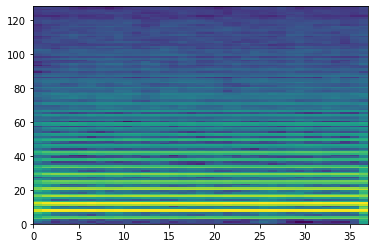

In [19]:
plt.pcolormesh( 10 * np.log10(S))

In [20]:
(10 * np.log10(S)).shape

(128, 37)

In [21]:
#S

In [23]:
X = []
y = []
for f in files:
    rate, wav_sample = wav.read(f)
    wav_sample = wav_sample.astype(float)
    reason = f[-10:-8]
    if reason == 'hu':
        r = [1,0,0,0,0,0,0,0,0]
    elif reason == 'bu':
        r = [0,1,0,0,0,0,0,0,0]
    elif reason == 'bp':
        r = [0,0,1,0,0,0,0,0,0]
    elif reason == 'dc':
        r = [0,0,0,1,0,0,0,0,0]
    elif reason == 'ti':
        r = [0,0,0,0,1,0,0,0,0]        
    elif reason == 'lo':
        r = [0,0,0,0,0,1,0,0,0]
    elif reason == 'ch':
        r = [0,0,0,0,0,0,1,0,0]
    elif reason == 'sc':
        r = [0,0,0,0,0,0,0,1,0]
    elif reason == 'dk':
        r = [0,0,0,0,0,0,0,0,1]   
    
    if rate == 16000:
        wav_sample = wav_sample[:16000*5]
        #S1 = librosa.feature.melspectrogram(y=wav_sample[::2], sr=8000)
        f, t, S1 = spectrogram(wav_sample[::2], fs=8000)
        #tmp = (10 * np.log10(S1)).ravel()
        tmp=S1.ravel()
        tmp = tmp/max(abs(tmp))
        X.append(list(tmp)) 
        y.append(r)
        #S2 = librosa.feature.melspectrogram(y=wav_sample[1::2], sr=8000)
        f, t, S2 = spectrogram(wav_sample[1::2], fs=8000)
        #tmp = (10 * np.log10(S2)).ravel()
        tmp=S2.ravel()
        tmp = tmp/max(abs(tmp))
        X.append(list(tmp)) 
        y.append(r)
    elif rate == 8000:
        wav_sample = wav_sample[:8000*5]
        #S = librosa.feature.melspectrogram(y=wav_sample, sr=8000)
        f, t, S = spectrogram(wav_sample, fs=8000)        
        #tmp = (10 * np.log10(S)).ravel()
        tmp=S.ravel()

        tmp = tmp/max(abs(tmp))
        X.append(list(tmp))  
        y.append(r)
#         print(tmp)

C:\Users\91902\anaconda3\envs\env\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
C:\Users\91902\anaconda3\envs\env\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


In [24]:
#print(y)

In [25]:
csv_path = 'D:/mainproject/Data/wav/ESC-50-master/meta/esc50.csv'
audio_path = 'D:/mainproject/Data/wav/ESC-50-master/audio/'
meta = pd.read_csv(csv_path)

In [26]:
meta = meta[meta.category != 'crying_baby']

In [27]:
 for f in meta.filename.values:
    rate, wav_sample = wav.read(audio_path+f)
    if len(wav_sample) >= rate*5:
        wav_sample = wav_sample[:rate*5]
    else:
        print(f)
    wav_sample = wav_sample.astype(float)
    y_8k = librosa.resample(wav_sample, rate, 8000)
    #S = librosa.feature.melspectrogram(y=y_8k, sr=8000)
    f, t, S = spectrogram(y_8k, fs=8000)
    #tmp = (10 * np.log10(S)).ravel()
    tmp = S.ravel()
    tmp = tmp/max(abs(tmp))
    tmp=[tmp]
    X.append(tmp) 
    y.append([0,0,0,0,0,0,0,0,0])

In [28]:
#print(y)

n_fft = 2048 # output of fft will have shape [1024 x n_frames]
n_hop = 512  # 50% overlap between frames
n_mels = 128 # compress 2048 dimensions to 128 via mel frequency scale
sample_rate = 8000

from fastai_audio.transform import get_frequency_batch_transforms
tfms = get_frequency_batch_transforms(n_fft=n_fft, n_hop=n_hop,
                                      n_mels=n_mels, sample_rate=sample_rate)

from fastai_audio.data import AudioItemList
batch_size = 64
data = (AudioItemList.from_folder(out_path)
        .split_by_folder()
        .label_from_folder()
        .databunch(bs=batch_size, tfms=tfms, equal_lengths=False))

learn = create_cnn(data, models.resnet34, metrics=accuracy)

learn.lr_find(start_lr=0.001, end_lr=1)
learn.recorder.plot()

In [29]:
bad = []
for i in range(len(X)):
    if len(X[i]) != 10112:
        bad.append(i)

In [31]:
#print(bad)

In [32]:
#input_tensor = Input(shape=(128, 224, 1))
#base_model = ResNet50(input_tensor=input_tensor, weights='imagenet', include_top=False)

In [45]:
print(np.array(X).shape)

X = np.array(X,dtype=object)
y = np.array(y,dtype=object)
#np.array(y).shape
np.savetxt("X_scipy.csv", X, delimiter=",", fmt='%s')
np.savetxt("y_scipy.csv", y, delimiter=",", fmt='%s')

(3504,)


In [35]:
type(X)

numpy.ndarray

In [38]:
#print(X)

In [39]:
X.shape

(3504,)

In [40]:
# Simple model:
import tensorflow 
model = tensorflow.keras.Sequential()
# model.add(tensorflow.keras.layers.Conv1D(100, 10, activation='relu', input_shape=(10112,)))
# model.add(tensorflow.keras.layers.Conv1D(160, 10, activation='relu'))
# model.add(tensorflow.keras.layers.GlobalAveragePooling1D())

model.add(tensorflow.keras.layers.Dense(1000, activation='relu',input_shape=(10112,)))
model.add(tensorflow.keras.layers.Dense(100, activation='relu'))
model.add(tensorflow.keras.layers.Dense(9, activation='softmax'))

optimizer = tensorflow.keras.optimizers.Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'],) # 'categorical_crossentropy'

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              10113000  
_________________________________________________________________
dense_1 (Dense)              (None, 100)               100100    
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 909       
Total params: 10,214,009
Trainable params: 10,214,009
Non-trainable params: 0
_________________________________________________________________


In [41]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.3)

In [43]:
batch_size = 24
steps_per_epoch = int(len(X)/batch_size)

model.fit(x_train, y_train)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).